In [1]:
!pip install ipykernel

In [2]:
!pip install pandas
import pandas as pd

     |████████████████████████████████| 12.3 MB 20.2 MB/s eta 0:00:01
     |████████████████████████████████| 341 kB 68.6 MB/s eta 0:00:01
     |████████████████████████████████| 502 kB 37.6 MB/s eta 0:00:01
     |████████████████████████████████| 17.3 MB 53.5 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/FSDSRegression/main/notebooks/data/gemstone.csv')

In [6]:
df.shape

(193573, 11)

In [9]:
#To find the missing value: No missing values present in the data
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [11]:
df = df.drop(labels='id', axis = 1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [15]:
df_copy = df.sample(50000)
df_copy.shape
df_copy.tail()

,carat,cut,color,clarity,depth,table,x,y,z,price
87902,1.24,Premium,H,SI2,62.4,58.0,6.82,6.85,4.27,4842
61517,0.32,Ideal,F,VS2,61.2,55.0,4.46,4.48,2.73,828
86796,0.58,Ideal,E,SI1,62.7,55.0,5.33,5.38,3.36,1778
138886,1.01,Premium,H,SI2,62.7,58.0,6.38,6.33,3.98,3919
41321,1.57,Ideal,F,SI1,61.6,56.0,7.45,7.51,4.61,13112


In [20]:
df_copy.duplicated().sum()

0

In [22]:
## segregate numerical and categorical columns for EDA analysis

numerical_columns=df_copy.columns[df.dtypes!='object']
categorical_columns=df_copy.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [24]:
df_copy[categorical_columns].describe()

,cut,color,clarity
count,50000,50000,50000
unique,5,7,8
top,Ideal,G,SI1
freq,23940,11494,13649


In [25]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 112754 to 41321
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   x        50000 non-null  float64
 7   y        50000 non-null  float64
 8   z        50000 non-null  float64
 9   price    50000 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 5.2+ MB


In [26]:
df_copy['cut'].unique()

array(['Premium', 'Fair', 'Very Good', 'Ideal', 'Good'], dtype=object)

In [27]:
df_copy['cut'].nunique()

5

In [28]:
df_copy['cut'].value_counts()

cut
Ideal        23940
Premium      12791
Very Good     9769
Good          2985
Fair           515
Name: count, dtype: int64

In [29]:
df_copy['color'].value_counts()

color
G    11494
E     9248
F     8852
H     7936
D     6299
I     4533
J     1638
Name: count, dtype: int64

In [30]:
df_copy['clarity'].value_counts()

clarity
SI1     13649
VS2     12528
VS1      7874
SI2      7799
VVS2     4132
VVS1     2827
IF       1050
I1        141
Name: count, dtype: int64

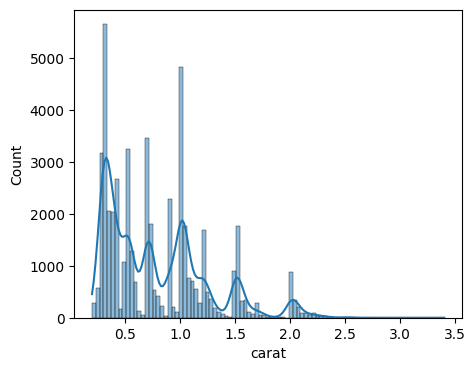

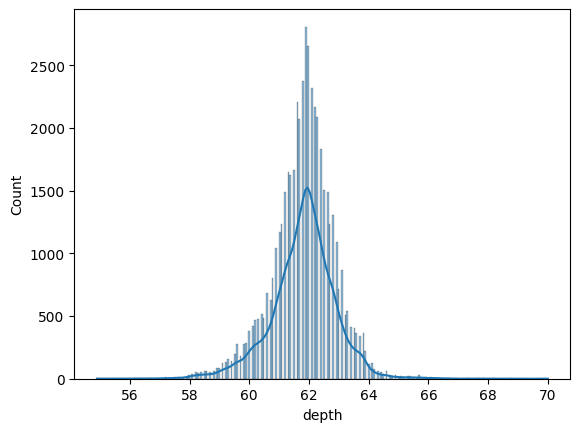

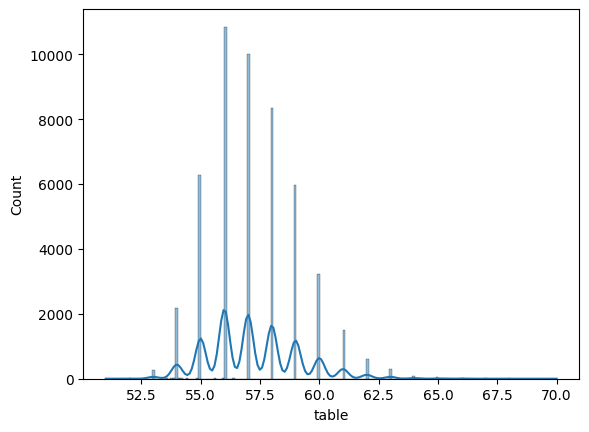

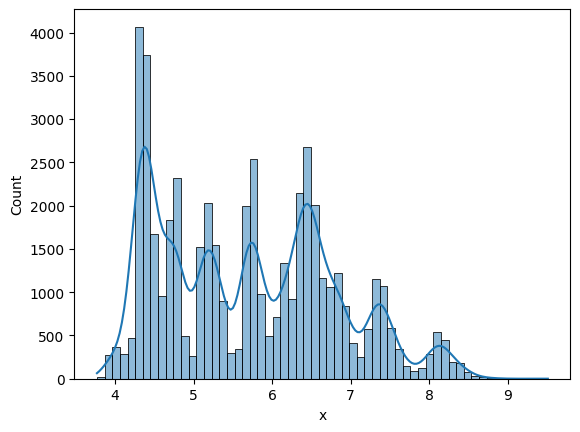

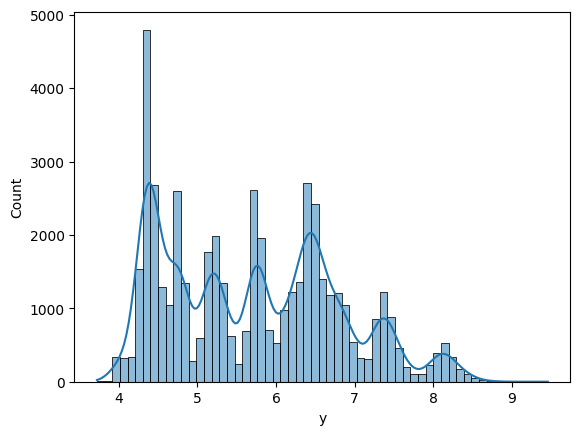

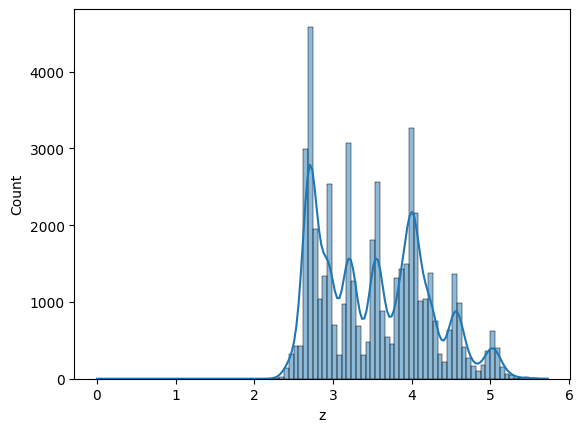

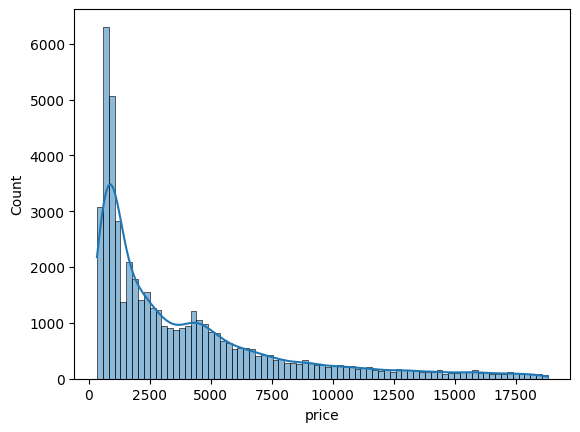

In [34]:
!pip install seaborn
!pip install matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
x=0
for i in numerical_columns:
    sns.histplot(data=df_copy,x=i,kde=True)
    print('\n')
    plt.show()

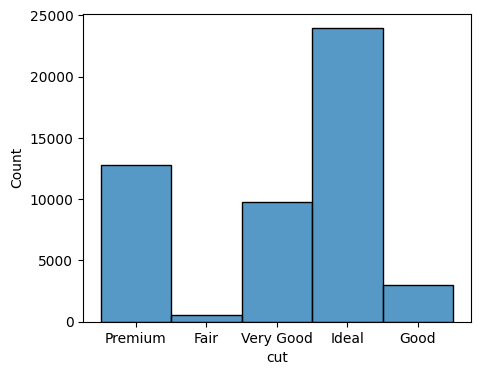

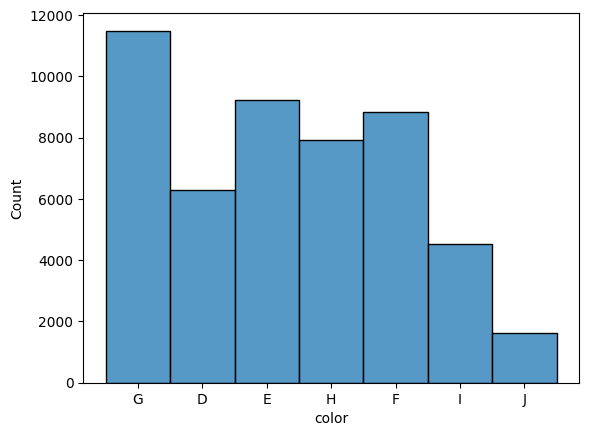

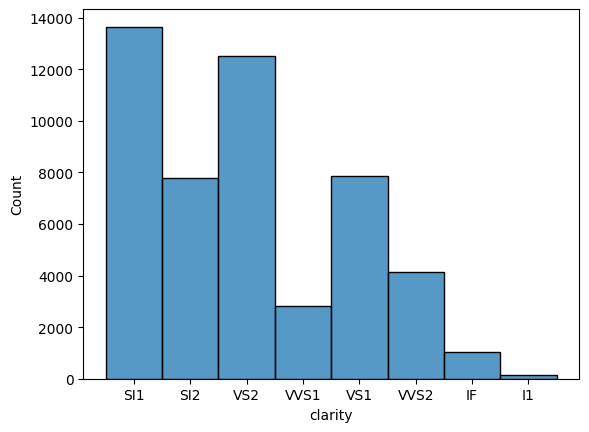

In [59]:
#Categorical Data
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
x=0
for i in categorical_columns:
    sns.histplot(data=df_copy,x=i)
    print('\n')
    plt.show()

In [50]:
df_copy.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
112754,0.76,Premium,G,SI1,61.2,60.0,5.89,5.83,3.57,2705
61098,1.00,Fair,D,SI2,58.4,68.0,6.50,6.53,3.80,4077
26080,1.05,Very Good,G,VS2,62.9,58.0,6.42,6.45,4.05,6486
46973,0.38,Ideal,G,VVS1,61.9,55.0,4.64,4.68,2.89,944
40334,0.28,Very Good,E,VVS1,60.0,61.0,4.20,4.24,2.55,769


In [53]:
df_copy[numerical_columns]

,carat,depth,table,x,y,z,price
112754,0.76,61.2,60.0,5.89,5.83,3.57,2705
61098,1.00,58.4,68.0,6.50,6.53,3.80,4077
26080,1.05,62.9,58.0,6.42,6.45,4.05,6486
46973,0.38,61.9,55.0,4.64,4.68,2.89,944
40334,0.28,60.0,61.0,4.20,4.24,2.55,769
...,...,...,...,...,...,...,...
87902,1.24,62.4,58.0,6.82,6.85,4.27,4842
61517,0.32,61.2,55.0,4.46,4.48,2.73,828
86796,0.58,62.7,55.0,5.33,5.38,3.36,1778
138886,1.01,62.7,58.0,6.38,6.33,3.98,3919


<Axes: >

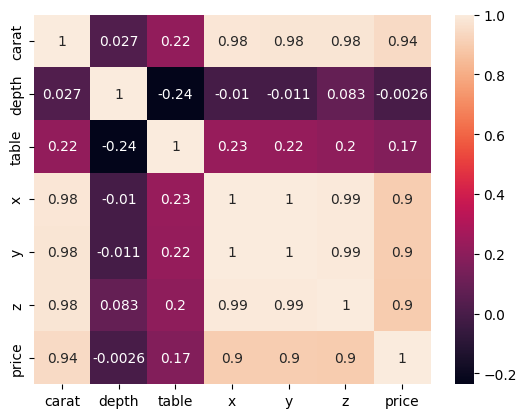

In [54]:
## correlation Heat map can be converted only in numerical co-relations
sns.heatmap(df_copy[numerical_columns].corr(),annot=True)

In [66]:
#Categorical Data
plt.figure(figsize=(5,4))
sns.barplot(df_copy['clarity'])
plt.show()

ValueError: could not convert string to float: 'SI1'

<Figure size 500x400 with 0 Axes>

In [ ]:
##Currently we will not execute this
## df.drop(labels=['x','y','z'],axis=1)

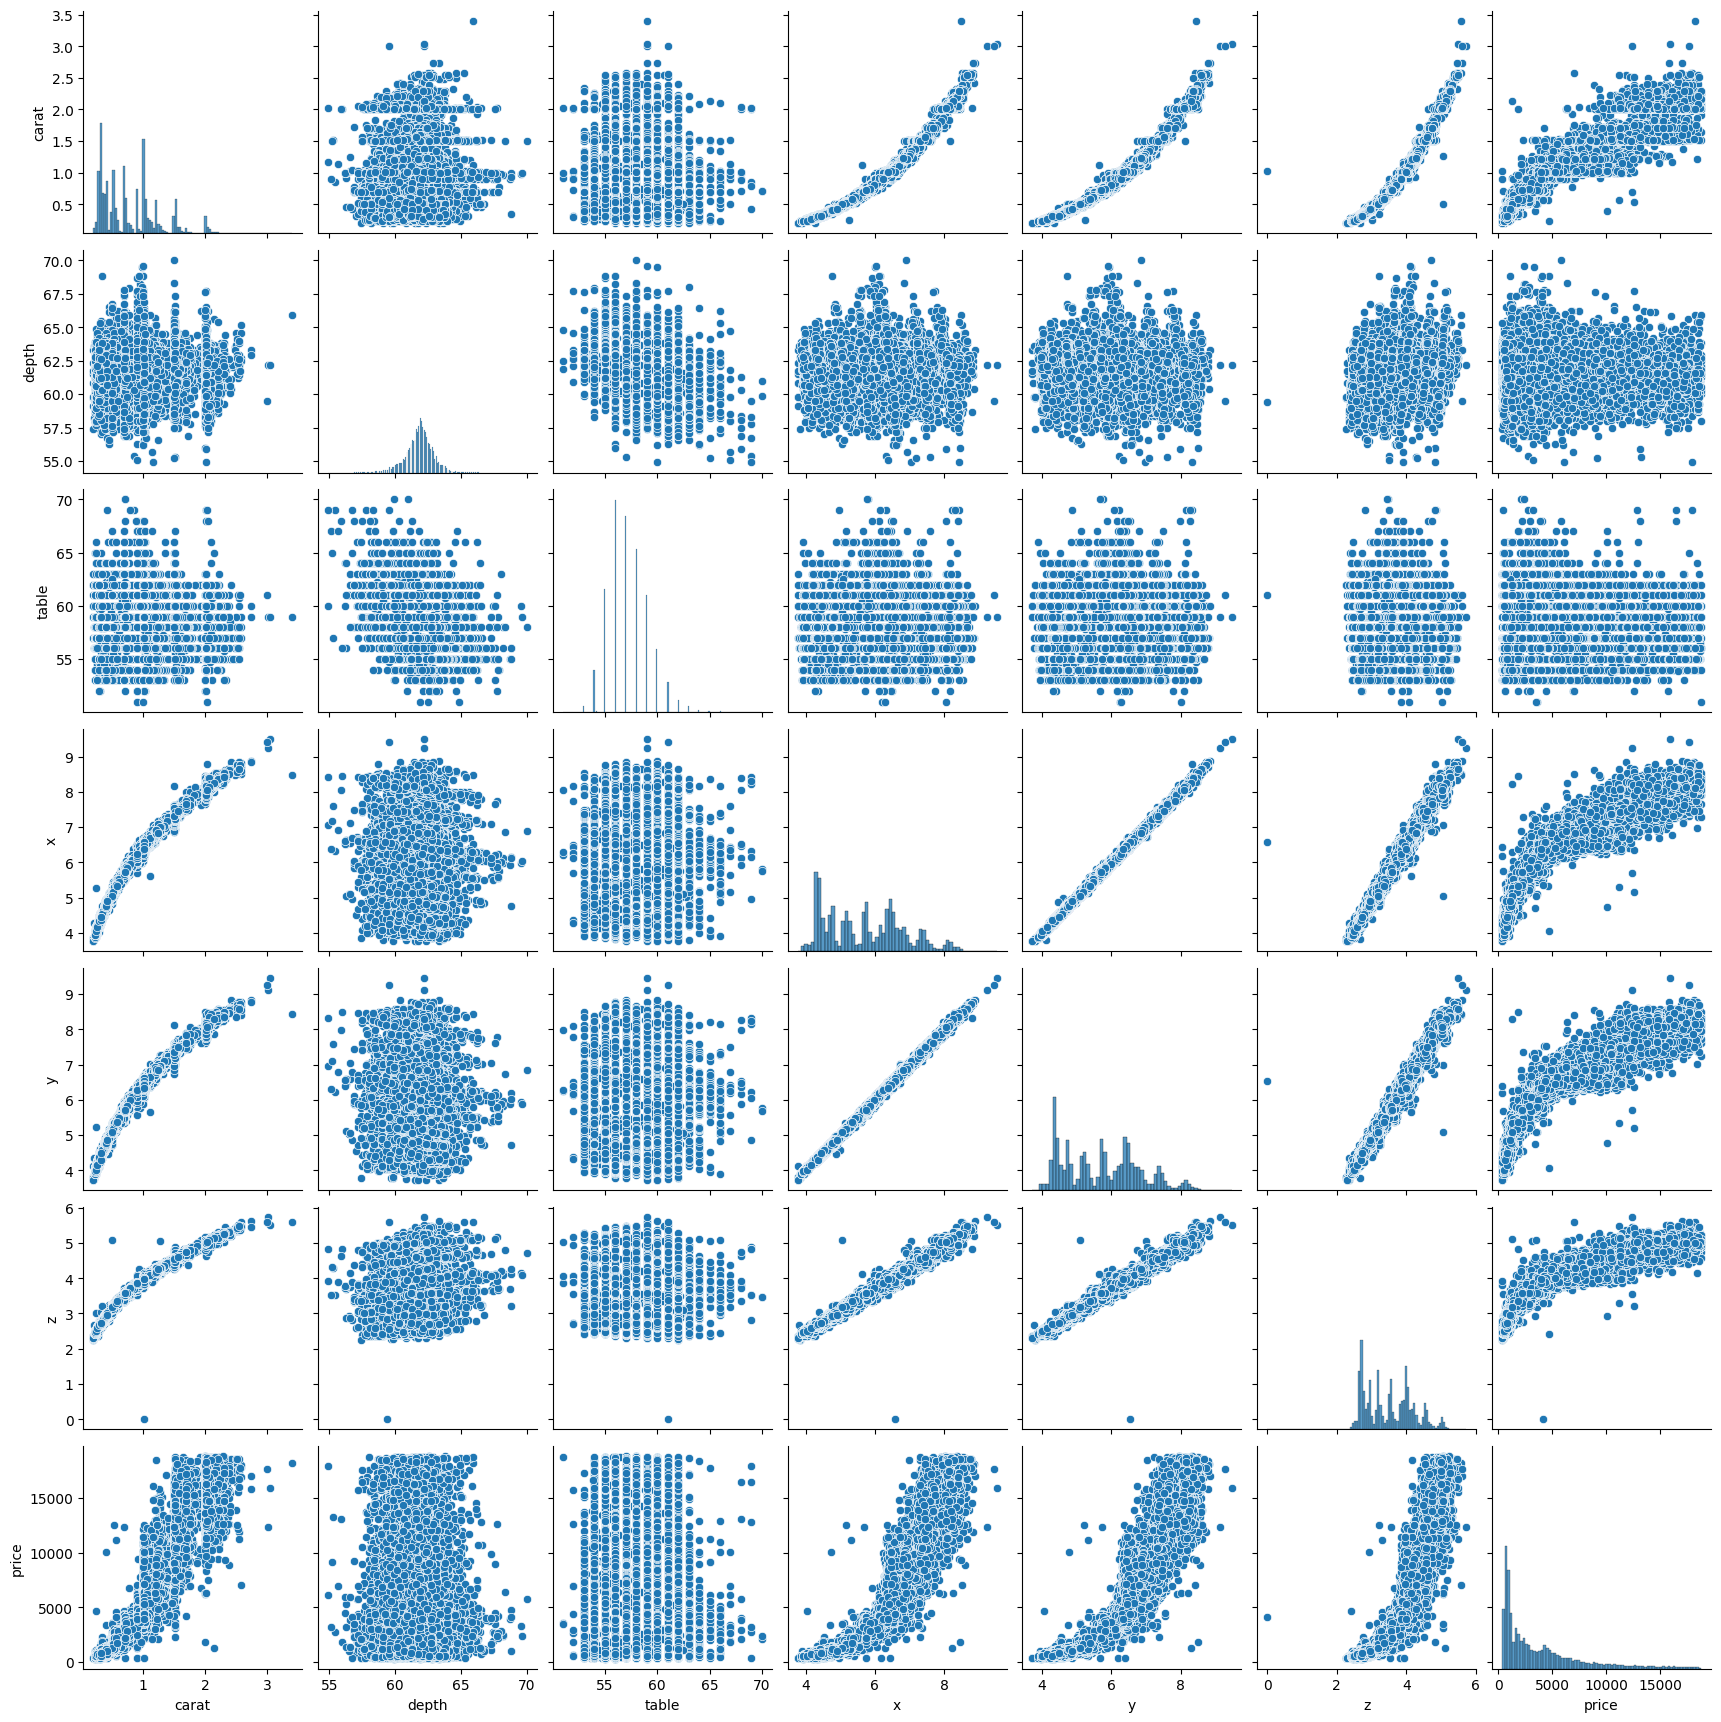

In [67]:
sns.pairplot(df_copy)

In [72]:
df_copy['cut'].unique() #Ordinal Features that has rank

array(['Premium', 'Fair', 'Very Good', 'Ideal', 'Good'], dtype=object)

In [69]:
#https://www.americangemsociety.org/buying-diamonds-with-confidence/ags-diamond-grading-system/
#Assign ranks to category based on domain
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

In [70]:
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [71]:
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [73]:
df_copy['cut']=df_copy['cut'].map(cut_map)
df_copy['clarity'] = df_copy['clarity'].map(clarity_map)
df_copy['color'] = df_copy['color'].map(color_map)

In [74]:
df_copy.head() #Replaced category with ranks

,carat,cut,color,clarity,depth,table,x,y,z,price
112754,0.76,4,4,3,61.2,60.0,5.89,5.83,3.57,2705
61098,1.00,1,1,2,58.4,68.0,6.50,6.53,3.80,4077
26080,1.05,3,4,4,62.9,58.0,6.42,6.45,4.05,6486
46973,0.38,5,4,7,61.9,55.0,4.64,4.68,2.89,944
40334,0.28,3,2,7,60.0,61.0,4.20,4.24,2.55,769


Diamond Price Prediction
Introduction About the Data :
The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

id : unique identifier of each diamond
carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
cut : Quality of Diamond Cut
color : Color of Diamond
clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
table : A diamond's table is the facet which can be seen when the stone is viewed face up.
x : Diamond X dimension
y : Diamond Y dimension
x : Diamond Z dimension
Target variable:

price: Price of the given Diamond.
Dataset Source Link : https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv
